In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/BartekGRK/Python_data_analysis/master/Pandas_Salaries/Salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


# What is the average BasePay?

In [4]:
df.BasePay.mean()

66325.4488404877

# What is the highest amount of OvertimePay in the dataset ?

In [5]:
df.OvertimePay.max()

245131.88

# What is the job title of JOSEPH DRISCOLL ? 

In [6]:
df[df.EmployeeName == "JOSEPH DRISCOLL"].JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

# How much does JOSEPH DRISCOLL make (including benefits)?

In [7]:
# add column with total pay including benfits. NaN values from column Benefits changed to 0.0 only for compute 

df["TotalPayBenefits"] = df["Benefits"].apply(lambda x: 0.0 if pd.isna(x) else x ) + df["TotalPay"]
df.TotalPayBenefits

0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653      -618.13
Name: TotalPayBenefits, Length: 148654, dtype: float64

In [8]:
df[df.EmployeeName == "JOSEPH DRISCOLL"].iloc[:, 3:7]

,BasePay,OvertimePay,OtherPay,Benefits
24,140546.86,97868.77,31909.28,NaN


In [9]:
# changed to array 
df[df.EmployeeName == "JOSEPH DRISCOLL"].iloc[:, 3:7].values[0]

array([140546.86,  97868.77,  31909.28,       nan])

In [10]:
# Answer
df[df.EmployeeName == "JOSEPH DRISCOLL"][["Benefits", "TotalPay"]].sum(axis=1)

24    270324.91
dtype: float64

# What is the name of highest paid person (including benefits)?

In [11]:
df.loc[df.index == df.TotalPayBenefits.argmax()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


# What is the name of lowest paid person (including benefits)? 

In [12]:
df.loc[df.index == df.TotalPayBenefits.argmin()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


For some reason value is negative

# What was the average (mean) BasePay of all employees per year? (2011-2014)?

In [13]:
# mean value of each group separetely
df[["BasePay", "Year"]].groupby("Year").mean()

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


# How many unique job titles are there?

In [14]:
len(df.JobTitle.value_counts())

2159

#What are the top 5 most common jobs?

In [15]:
df.JobTitle.value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

#How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)

In [16]:
count = df[df["Year"] == 2013].JobTitle.value_counts() 
len(count[count == 1])

202

#How many people have the word Chief in their job title?

In [17]:
df.JobTitle.apply(lambda x: "Chief" in x).sum()

423

#Is there a correlation between length of the Job Title string and Salary?

In [18]:
dfb = df[ ["JobTitle" , "TotalPayBenefits"]]
dfb[ "JobTitleLength" ] = dfb.JobTitle.apply( lambda x: len(x))
dfb[["JobTitleLength", "TotalPayBenefits"]].corr()
# No correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,JobTitleLength,TotalPayBenefits
JobTitleLength,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


#Generate a histogram plot of base salary with 30 bins?

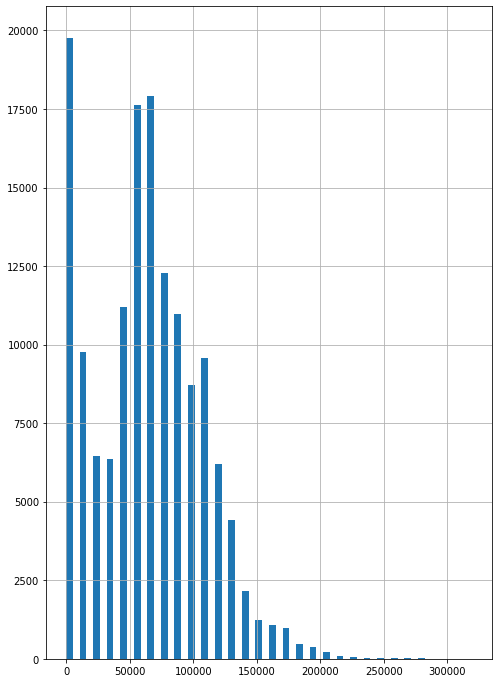

In [19]:
fig = plt.figure(figsize = (8,12))
ax = fig.gca()

df.BasePay.hist(ax = ax, bins=30, width = df.BasePay.max() / 30*0.5)